### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
### missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


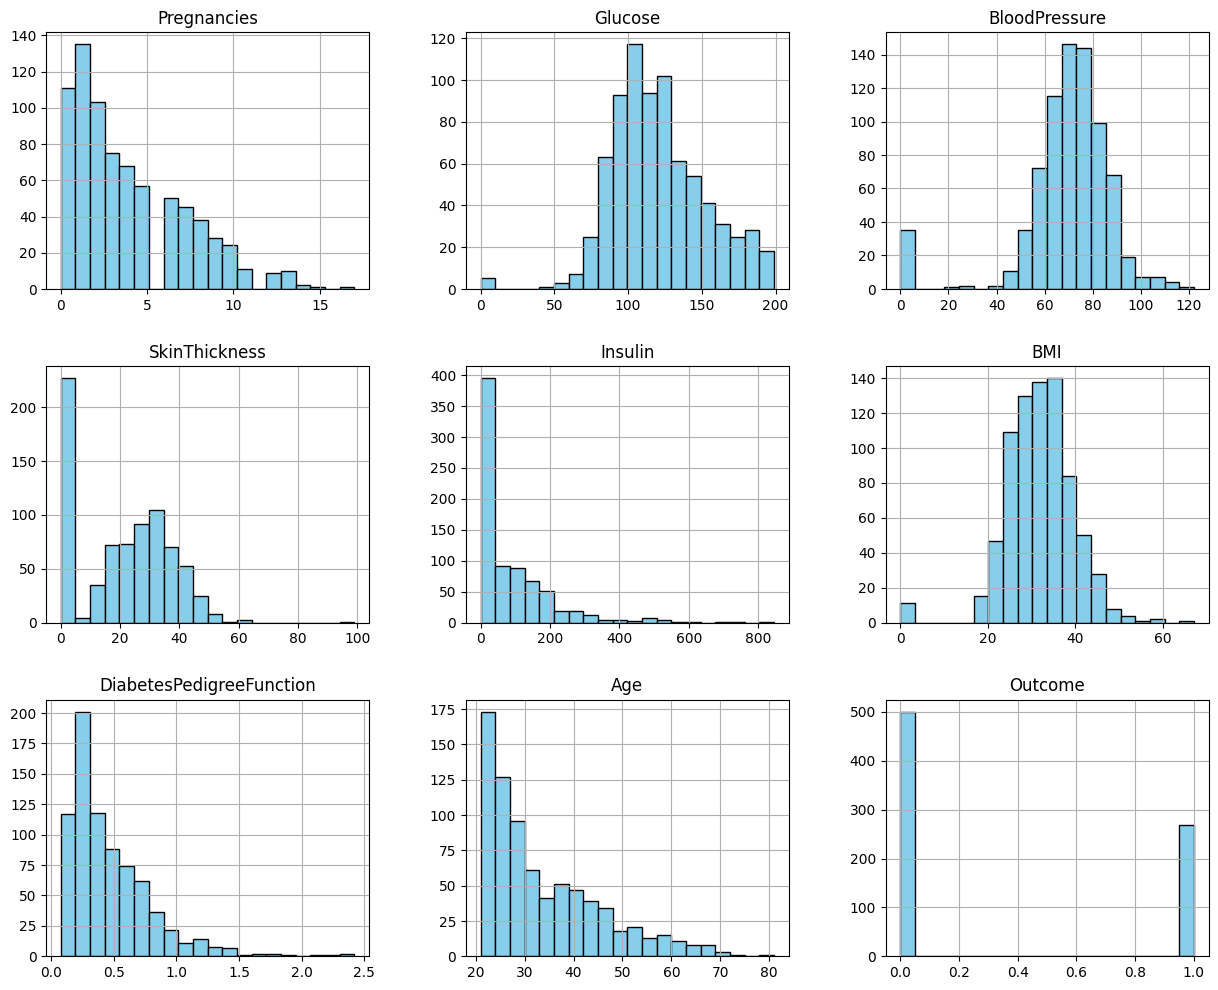

In [9]:
### to visualize the distributions
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.show()

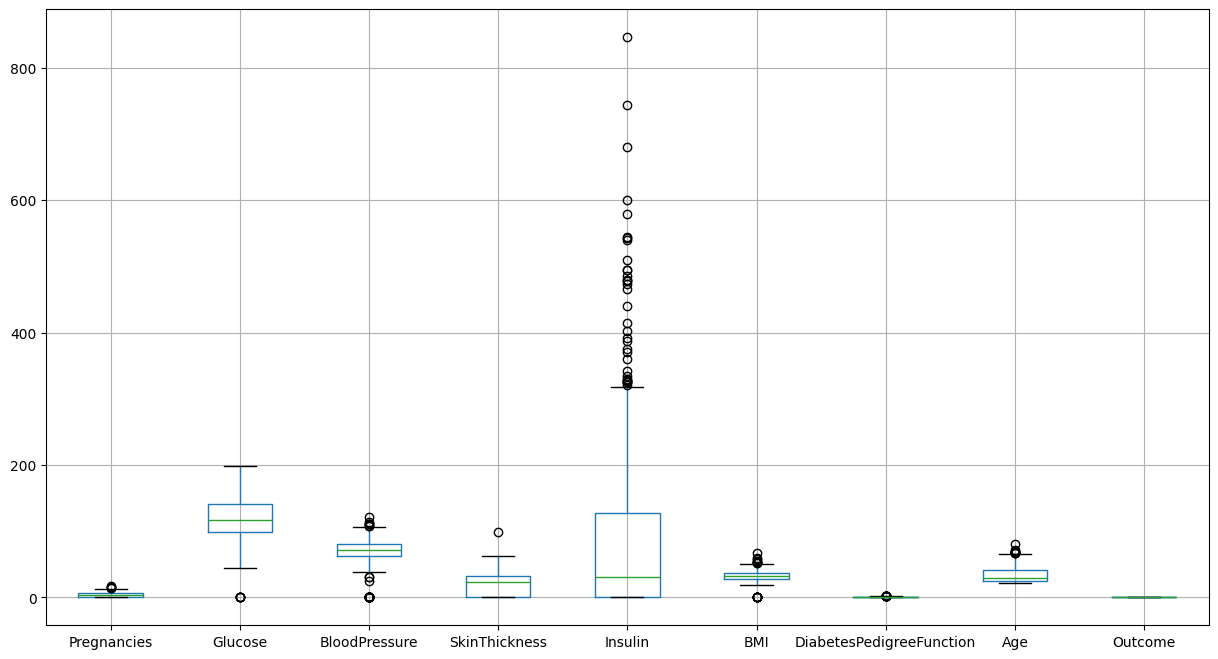

In [10]:
### outliers
plt.figure(figsize=(15, 8))
df.boxplot()
plt.show()

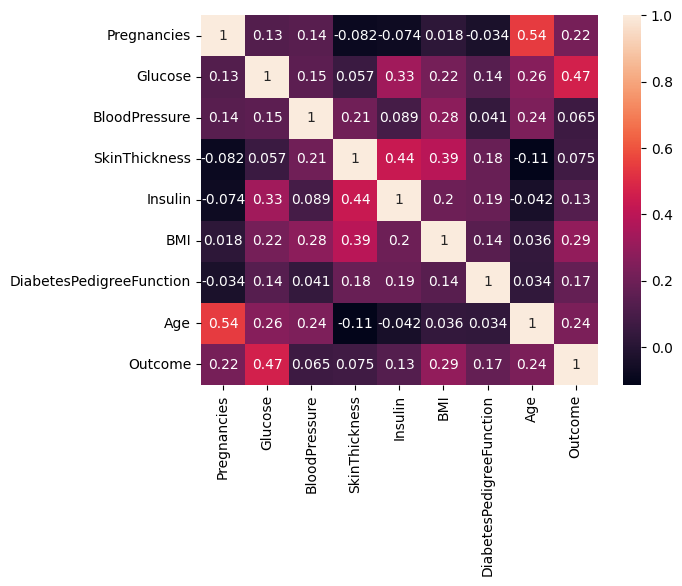

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [12]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [13]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576, 1)
(192, 1)


In [14]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [15]:
log_model.coef_

array([[ 1.04753355e-01,  3.19789316e-02, -1.52971711e-02,
        -7.50200553e-04, -9.32647163e-04,  7.41395662e-02,
         1.94302919e+00,  1.74814236e-02]])

In [16]:
log_model.intercept_

array([-7.74161663])

In [17]:
y_pred=log_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [18]:
accuracy_score(y_test,y_pred)

0.7447916666666666

In [19]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
precision

0.6428571428571429

In [21]:
recall

0.5538461538461539

In [22]:
f1

0.5950413223140496

In [23]:
### sigmoid values
sigmoid=log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.23864625, 0.07572022, 0.59129571, 0.15827668, 0.45588055,
       0.70130666, 0.9693701 , 0.16580595, 0.89306058, 0.26001196,
       0.08255627, 0.88259357, 0.64859365, 0.39411309, 0.68300475,
       0.33356787, 0.13800999, 0.27098491, 0.50392832, 0.17125602,
       0.20974134, 0.02507788, 0.52798983, 0.97219673, 0.24537943,
       0.79534331, 0.45200043, 0.33722626, 0.52260027, 0.53402674,
       0.06648406, 0.94639442, 0.3128712 , 0.62331384, 0.36345143,
       0.39744743, 0.92615997, 0.04250888, 0.15413215, 0.26883643,
       0.345484  , 0.8206504 , 0.4722605 , 0.11542229, 0.24622146,
       0.86777775, 0.09279453, 0.1781325 , 0.84052116, 0.83160722,
       0.10005394, 0.06840939, 0.33386554, 0.75279977, 0.71899136,
       0.90856373, 0.16919931, 0.08128436, 0.75828419, 0.146226  ,
       0.18240762, 0.19098486, 0.33390757, 0.35588054, 0.49310421,
       0.33765265, 0.20077906, 0.03706789, 0.2689158 , 0.03815471,
       0.06058226, 0.61854816, 0.11248347, 0.23120112, 0.20753

In [24]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.7764990914597215)

In [25]:
roc_curve(y_test,sigmoid)

(array([0.        , 0.00787402, 0.00787402, 0.01574803, 0.01574803,
        0.02362205, 0.02362205, 0.03937008, 0.03937008, 0.04724409,
        0.04724409, 0.05511811, 0.05511811, 0.06299213, 0.06299213,
        0.08661417, 0.08661417, 0.1023622 , 0.1023622 , 0.11811024,
        0.11811024, 0.12598425, 0.12598425, 0.13385827, 0.13385827,
        0.14173228, 0.14173228, 0.15748031, 0.15748031, 0.18110236,
        0.18110236, 0.21259843, 0.21259843, 0.26771654, 0.26771654,
        0.29133858, 0.29133858, 0.30708661, 0.30708661, 0.32283465,
        0.32283465, 0.33858268, 0.33858268, 0.34645669, 0.34645669,
        0.35433071, 0.35433071, 0.36220472, 0.36220472, 0.37795276,
        0.37795276, 0.39370079, 0.39370079, 0.47244094, 0.47244094,
        0.51968504, 0.51968504, 0.55905512, 0.55905512, 0.56692913,
        0.56692913, 0.58267717, 0.58267717, 0.61417323, 0.61417323,
        0.67716535, 0.67716535, 0.70866142, 0.70866142, 0.72440945,
        0.72440945, 0.83464567, 0.83464567, 1.  

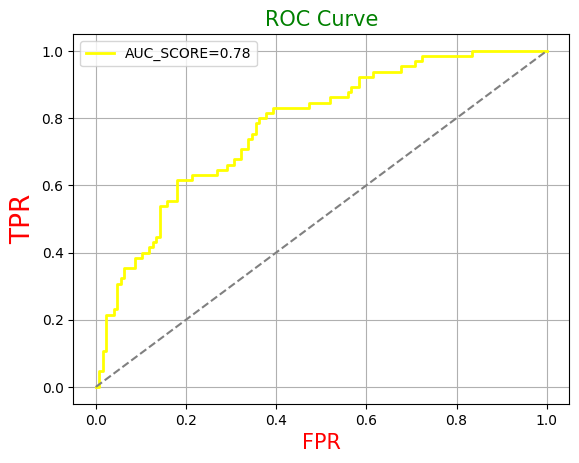

In [26]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,color='yellow',linewidth=2,label=f'AUC_SCORE={auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=19,color='red')
plt.title('ROC Curve',color='green',size=15)
plt.legend()
plt.grid()
plt.show()

In [27]:
### The most influential feature is clearly DiabetesPedigreeFunction, followed by BMI, Pregnancies, and Glucose. BloodPressure, SkinThickness, and Insulin have minimal effect in this dataset.

In [31]:
!pip install streamlit
import streamlit as st
import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.2 MB/s eta 0:00:00


In [32]:
file='log.pkl'

In [33]:
pickle.dump(log_model,open(file,'wb'))

In [34]:
# ---------------- STREAMLIT APPLICATION ---------------- #

import streamlit as st
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open('log.pkl', 'rb'))

st.title("Diabetes Prediction Application")

st.write("Enter the patient details below to predict diabetes outcome")

# User input fields
pregnancies = st.number_input("Pregnancies", min_value=0)
glucose = st.number_input("Glucose Level", min_value=0)
blood_pressure = st.number_input("Blood Pressure", min_value=0)
skin_thickness = st.number_input("Skin Thickness", min_value=0)
insulin = st.number_input("Insulin Level", min_value=0)
bmi = st.number_input("BMI", min_value=0.0)
diabetes_pedigree = st.number_input("Diabetes Pedigree Function", min_value=0.0)
age = st.number_input("Age", min_value=0)

# Predict button
if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, blood_pressure,
                             skin_thickness, insulin, bmi,
                             diabetes_pedigree, age]])

    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.success("The model predicts: Diabetic")
    else:
        st.success("The model predicts: Not Diabetic")


2026-01-20 13:44:28.405 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 13:44:29.189 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-20 13:44:29.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 13:44:29.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 13:44:29.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 13:44:29.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 13:44:29.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-20 13:44:29.222 Thread 'MainThread': mi

Streamlit Application:
A Streamlit-based web application was developed to deploy the trained logistic regression model. The application allows users to input patient health parameters and predicts whether the patient is diabetic or non-diabetic. This demonstrates the practical deployment of the machine learning model.

In [35]:
### difference between precision and recall
### precision and recall are two metrics used to evaluate the performance of your model
### Precision measures how many of the predicted positive cases are actually positive whereas Recall measures how many of the actual positive cases were correctly predicted

In [36]:
### cross validation
### Cross-validation is a technique to evaluate the performance of a machine learning model more reliably, instead of just testing it on a single train-test split.
### it is important because it reduces overfitting,better performance estimate,it handles imbalanced classes,helps compare multiple models or hyperparameters without overfitting to a single split.